# Uebung 1:

## Aufgabe 1: SRTM / SwissALTI3D
### Laden Sie mind. 4 Dateien des SRTM Datensatzes um die Region des Mount Everest.
### https://srtm.csi.cgiar.org/srtmdata/

#### Alle imports die für dieses Übung notwendig sind:

In [31]:
import geoutils
from zipfile import ZipFile
import os
import rasterio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
import numpy as np

#### Alle GTiff herunterlagen (nicht von https://srtm.csi.cgiar.org/srtmdata/ sonder von https://www.geopython.xyz/geodata/srtm/)

In [32]:
dest_dir = "geodata/uebung1/"

base = "https://www.geopython.xyz/geodata/srtm/"

urls = [base + "srtm_53_06.zip", base + "srtm_53_07.zip",
        base + "srtm_54_06.zip", base + "srtm_54_07.zip",
        base + "srtm_55_06.zip", base + "srtm_55_07.zip"]

for url in urls:
    geoutils.download(url, dest_dir + os.path.basename(url), False)

File already exists, not overwriting.
File already exists, not overwriting.
File already exists, not overwriting.
File already exists, not overwriting.
File already exists, not overwriting.
File already exists, not overwriting.


In [33]:
def unzip(source, dest):
    zz = ZipFile(source, "r")
    for item in zz.infolist():
        path = dest + "/" + item.filename
        if not os.path.exists(path):
            zz.extract(item, dest) 
    zz.close()

#### Alle Dateien entzipen

In [34]:
base = "geodata/uebung1/"

urls = [base + "srtm_53_06.zip", base + "srtm_53_07.zip",
        base + "srtm_54_06.zip", base + "srtm_54_07.zip",
        base + "srtm_55_06.zip", base + "srtm_55_07.zip"]

for url in urls:
    unzip(url, base)

In [35]:
# import os

# for url in urls:
#     pfad = "geodata/uebung1/" + os.path.basename(url)
#     print(pfad)

## a) Erstellen Sie aus den Dateien einen virtuellen Datensatz (vrt) und die Overlays.

In [36]:
# import glob
# file = open("filelist.txt", "w", encoding="utf-8")

# tiffs = glob.glob("geodata/uebung1/*.tif")
# for tif in tiffs:
#     file.write(tif + "\n")

# file.close

In [37]:
#!gdalbuildvrt -input_file_list filelist.txt geodata/uebung1/everest.vrt

In [38]:
!gdalbuildvrt geodata/uebung1/everest.vrt geodata/uebung1/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [39]:
!gdaladdo -r average geodata/uebung1/everest.vrt 2 4 8 16 32

0...10...20...30...40...50...60...70...80...90...100 - done.


### Daten: everest.vtr & everest.vtr.ovr

## b) Erstellen Sie eine Geländeschummerung

### Koordinaten Everest:  86.9252027537068, 27.98941911358151

In [40]:
!gdal_translate -of GTiff -co TILED=YES -projwin 80.01 34.99 94.99 25.01 geodata/uebung1/everest.vrt geodata/uebung1/everest.tif
#Achtung, nicht Bounding Box der Schweiz ! --> Bounding Box 0.01 grösser bzw. kleiner als vrt-Datei

Input file size is 8535, 4752
0...10...20...30...40...50...60...70...80...90...100 - done.


In [41]:
#tif-Datei braucht man nicht unbedingt:
#!gdaldem hillshade geodata/uebung1/everest.vrt geodata/uebung1/hillshade.tif

In [42]:
!gdaldem hillshade geodata/uebung1/everest.tif geodata/uebung1/everest_hillshade.png

0...10...20...30...40...50...60...70...80...90...100 - done.


In [43]:
#from IPython.display import Image

#Image(filename="geodata/uebung1/everest_hillshade.png")

## c) Erstellen Sie ein Vektorfile mit Höhenlinien (250m)

In [44]:
!gdal_contour -a elev -i 250 geodata/uebung1/everest.tif geodata/uebung1/everest_contours.shp
#-i ist Abstand Höhenlinien
#!gdal_contour -a elev -i 250 geodata/uebung1/everest.vrt geodata/uebung1/hoehenlinien.shp

0...10...20...30...40...50...60...70...80...90...100 - done.


## d) Ermitteln Sie den höchsten Punkt im Datensatz mit rasterio.

In [45]:
dataset = rasterio.open("geodata/uebung1/everest.tif")

In [46]:
elevation = dataset.read()
max_value = np.amax(elevation)

In [47]:
max_value

8794

In [48]:
np.max(elevation)

8794

## e) Stellen Sie den alles mit matplotlib (imgshow) dar.

#### everest_small erstellen

In [49]:
!gdal_translate -outsize 2048 1024 geodata/uebung1/everest.tif geodata/uebung1/everest_small.tif

Input file size is 8524, 4743
0...10...20...30...40...50...60...70...80...90...100 - done.


In [50]:
dataset.transform * (2047, 1023)

(83.60624746474187, 32.83896047763652)

In [51]:
px,py = ~dataset.transform * (86.9252027537068, 27.98941911358151)
#Mount Everest

In [52]:
#!gdalinfo geodata/uebung1/everest_small.tif

In [53]:
w = dataset.read(1)
#hier ist dataset nur 1 Farbig (Schwarz-Weiss) --> nur 1 Band

In [54]:
sw = np.stack((w)) #hier np.stack benutzt lieber als np.dstack

In [55]:
w

array([[4999, 5004, 5012, ..., 4607, 4590, 4585],
       [5007, 5011, 5014, ..., 4612, 4590, 4576],
       [5041, 5052, 5055, ..., 4611, 4594, 4579],
       ...,
       [ 190,  189,  189, ...,  168,  155,  164],
       [ 189,  185,  189, ...,  168,  173,  146],
       [ 185,  188,  187, ...,  165,  174,  153]], dtype=int16)

In [56]:
sw

array([[4999, 5004, 5012, ..., 4607, 4590, 4585],
       [5007, 5011, 5014, ..., 4612, 4590, 4576],
       [5041, 5052, 5055, ..., 4611, 4594, 4579],
       ...,
       [ 190,  189,  189, ...,  168,  155,  164],
       [ 189,  185,  189, ...,  168,  173,  146],
       [ 185,  188,  187, ...,  165,  174,  153]], dtype=int16)

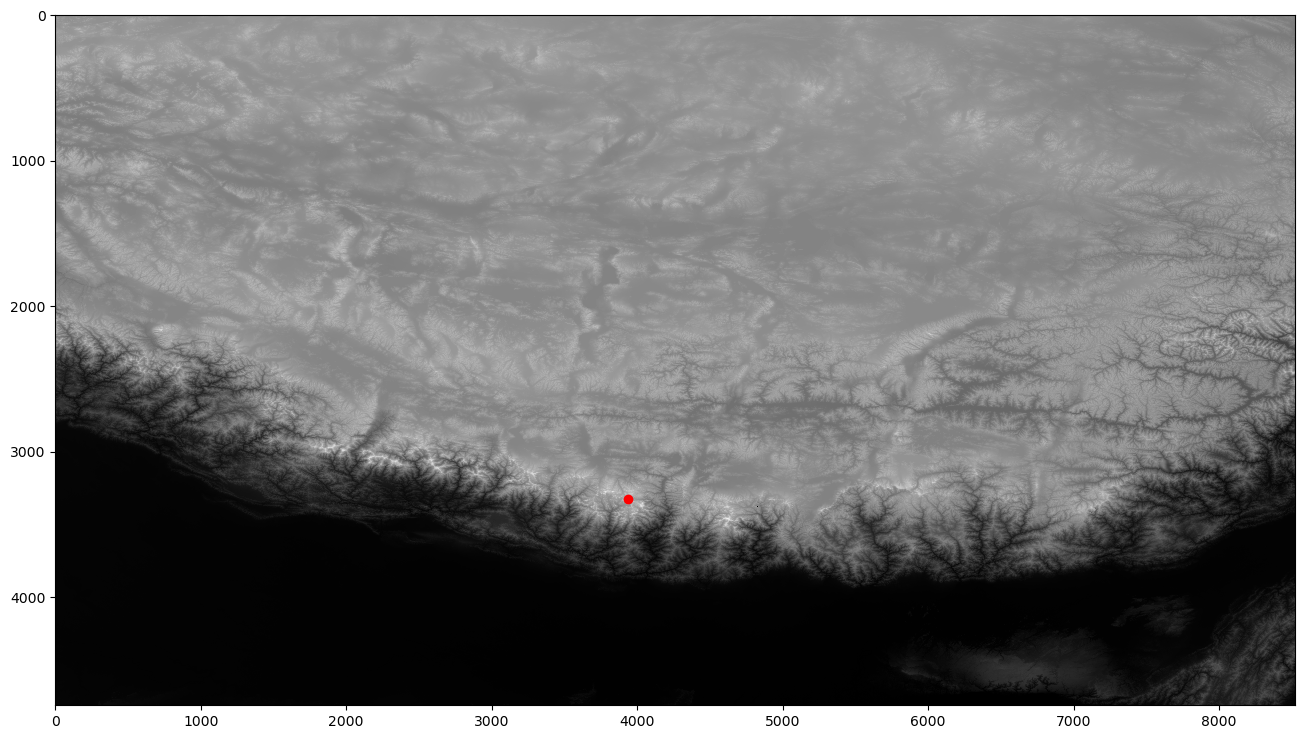

In [60]:
fig, ax = plt.subplots(figsize=(16,9))
ax = imshow(sw , cmap='gray', interpolation="nearest");
plt.plot(px,py, "ro");
#cmap = 'grey' --> Graue Karte